In [3]:
import jax
import jax.numpy as jnp
from jax import (jit, vmap)
import genjax
from genjax import gen, choice_map, vector_choice_map
import matplotlib.pyplot as plt
import numpy as np
import bayes3d
from xsight.utils import *

console = genjax.pretty(show_locals=False)
key     = jax.random.PRNGKey(0)


import genjax._src.generative_functions.distributions.tensorflow_probability as gentfp
import tensorflow_probability.substrates.jax as tfp
tfd = tfp.distributions




In [6]:
normal = gentfp.TFPDistribution(
    lambda mu, sig: tfd.Normal(mu, sig));

In [111]:
n = 100
x   = np.random.randn(n)
mu  = np.random.randn(n)
std = np.random.rand(n)

z = (x - mu) / std

reference       = jax.scipy.stats.norm.logpdf(x, mu, std)
currently_wrong = genjax.normal.logpdf(x, mu, std)
corrected       = - jnp.log(std) - 1/2*jnp.log(2*jnp.pi) - 1/2*z**2


err_curr = jnp.abs(reference - currently_wrong)
err_new  = jnp.abs(reference - corrected)

jnp.mean(err_curr) > jnp.mean(err_new)

Array(True, dtype=bool)

In [28]:
for _ in range(10):
    x   = np.random.randn()
    mu  = np.random.randn()
    std = np.random.rand()

    
    g  = -1.0 * (jnp.square(jnp.abs(z)) + jnp.log(2.0 * jnp.pi)) / (2 - jnp.log(std))
    
    print(,g_, g)


-4.2323127 -4.232313 -3.9645147
-25.195698 -25.195692 -13.407859
-590.7481 -590.7481 -264.862
-1.0462453 -1.046245 -1.4027895
-8.370258 -8.370258 -6.957136
-2.7706678 -2.770668 -2.5238276
-1.204403 -1.2044029 -1.2353776
-339.058 -339.05807 -130.19713
-6.3698573 -6.369858 -5.4103746
-0.89166623 -0.8916662 -0.99839085


Integral (scipy) : 1.001357078552246
Integral (genjax): 0.7360198497772217
Integral (tfp)   : 1.001357078552246


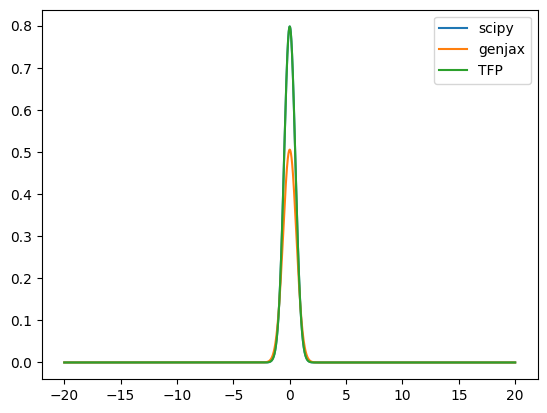

In [15]:
xs = jnp.linspace(-20, 20, 1_000_000)
dx =xs[1] - xs[0]


mu  = 0.0
sig = .5

ys1 = vmap(lambda x: jax.scipy.stats.norm.logpdf( x, mu, sig))(xs)
ys2 = vmap(lambda x: genjax.normal.logpdf(x, mu, sig))(xs)
ys3 = vmap(lambda x: normal.logpdf(x, mu, sig))(xs)

print(f"Integral (scipy) : {jnp.sum(jnp.exp(ys1)*dx)}")
print(f"Integral (genjax): {jnp.sum(jnp.exp(ys2)*dx)}")
print(f"Integral (tfp)   : {jnp.sum(jnp.exp(ys3)*dx)}")

plt.plot(xs, jnp.exp(ys1), label="scipy")
plt.plot(xs, jnp.exp(ys2), label="genjax")
plt.plot(xs, jnp.exp(ys3), label="TFP")
plt.legend()